# Анализ оттока клиентов банка «Метанпром»

**Цель исследования:** проанализировать клиентов регионального банка и выделить сегменты клиентов, которые склонны уходить из банка для того, чтобы выдвинуть рекомендации по удержанию клиентов отделу маркетинга.

**Задачи исследования:** 
- провести исследовательский анализ данных (распределения, портреты клиентов, корреляционный анализ);
- проверить статистические гипотезы, а именно:
1. Гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.  
2. Гипотезу различий в кредитном рейтинге между теми клиентами, которые ушли и теми, которые остались.
- установить какие признаки стратегически влияют на отток (какие значения или интервалы этих признаков связаны с оттоком);
- выделить сегменты на основе стратегических показателей и приоритезировать их;
- дать рекомендации по удержанию клиентов;
- подготовить презентацию, отражающую выводы проведенного исследования.

**План презентации:**
1. Описание проекта (вводные данные, цели и задачи исследования);
2. Ход исследования;
3. Демонстрация признаков, влияющих на отток клиентов;
4. Сегментация на основе стратегических показателей;
5. Рекомендации для удержания клиентов отделу маркетинга;
6. Заключительные выводы.

**Ход исследования:**
1. Изучение общей информации, подготовка данных;
2. Предобработка данных, а именно:
- выявление пропусков данных и их дальнейшее удаление либо замена;
- проверка на наличие дубликатов и их возможное удаление;
- проверка типов данных и приведение их к соответствию;
- рассмотреть наименование колонок, при необходимости переименовать для удобства, привести к нижнему регистру.
3. Исследовательский анализ данных;
4. Проверка статистических гипотез с применением статистического уровня значимости;
5. Установка признаков, влияющих на отток клиентов;
6. Сегментация на основе стратегических показателей;
7. Заключительные выводы и рекомендации исследования.

В распоряжении имеется датасет, содержащий данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности 
/ `equity`  — количество баллов собственности
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` / `last_activity` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

Презентация: https://disk.yandex.ru/i/YmjbuzttTj2szA

## Изучение общей информации, подготовка данных

In [76]:
import pandas as pd
! pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
import numpy as np
from scipy import stats as st
import itertools
import sys
from sqlalchemy import create_engine
!pip install phik 
import phik
from phik.report import plot_correlation_matrix

In [77]:
path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F" 
bank = pd.read_csv(path)

In [78]:
def get_info(bank):
    print('Число дубликатов:')
    print(bank.duplicated().sum())
    print('Процент дубликатов \n от общего числа строк:', (bank.duplicated().mean()*100).round(2), '%')
    print()
    print('Число пропусков:')
    print(bank.isna().sum())
    print()
    print('Процент пропусков \n в каждом столбце:', (bank.isna().mean()*100).round(2), '%')
    print()
    print('Информация о датасете')
    bank.info()
bank.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [79]:
get_info(bank)

Число дубликатов:
0
Процент дубликатов 
 от общего числа строк: 0.0 %

Число пропусков:
USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64

Процент пропусков 
 в каждом столбце: USERID            0.00
score             0.00
city              0.00
gender            0.00
age               0.26
equity            0.00
balance          22.95
products          0.00
credit_card       0.00
last_activity     0.00
EST_SALARY        0.00
churn             0.00
dtype: float64 %

Информация о датасете
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  floa

Явные дубликаты не обнаружены, имеются пропуски в столбцах возраста и баланса, продолжим детально изучать данные и решим что лучше сделать.

## Предобработка данных

In [80]:
bank.columns = bank.columns.str.lower()
bank

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


In [81]:
bank = bank.rename(columns={'userid':'user_id'})

In [82]:
bank['user_id'].value_counts()

141265    2
217826    2
126368    2
195884    2
202983    2
         ..
199413    1
205705    1
221433    1
152512    1
96267     1
Name: user_id, Length: 9927, dtype: int64

Видим, что есть задвоенные user_id, проверим так ли это.

In [83]:
len(bank[bank.duplicated(subset=['user_id', 'city'])])

0

Переиндексируем датафрейм:

In [84]:
bank.index +=1
bank = bank.reset_index()

In [85]:
del bank['user_id']

In [86]:
bank = bank.rename(columns={'index':'user_id'})
bank.head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,1,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,2,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,3,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,4,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,5,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,6,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,7,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,8,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,9,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,10,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


<Axes: >

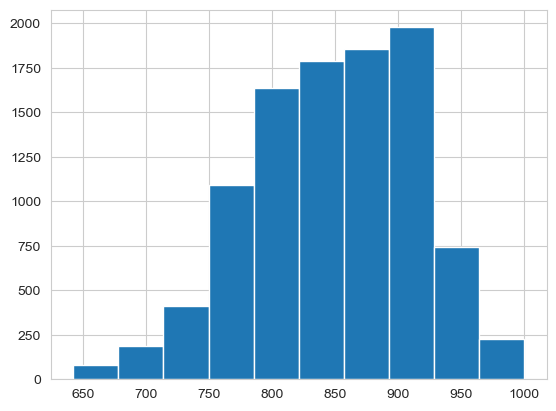

In [87]:
bank['score'].hist()

In [88]:
bank['score'].describe()

count    10000.000000
mean       848.699400
std         65.448519
min        642.000000
25%        802.000000
50%        853.000000
75%        900.000000
max       1000.000000
Name: score, dtype: float64

In [89]:
bank['city'].value_counts()

Ярославль    5888
Рыбинск      2695
Ростов       1417
Name: city, dtype: int64

Больше всего клиентов из Ярославля.

In [90]:
bank['gender'].value_counts()

М    5005
Ж    4995
Name: gender, dtype: int64

Клиенты мужчины - 5005, женщины 4995.

<Axes: >

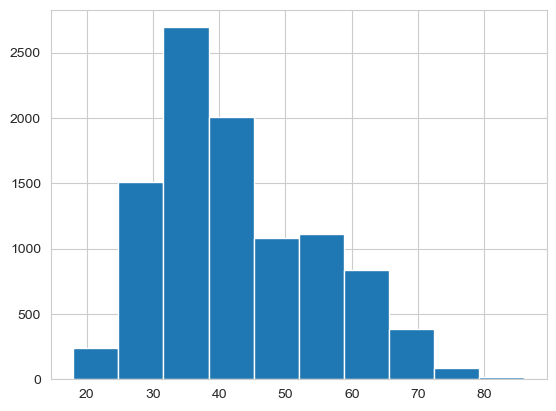

In [91]:
bank['age'].hist()

In [92]:
bank['age'].describe()

count    9974.000000
mean       42.734409
std        12.179971
min        18.000000
25%        33.000000
50%        40.000000
75%        51.000000
max        86.000000
Name: age, dtype: float64

In [93]:
bank['gender'] = bank['gender'].replace('Ж','0').replace('М','1').astype('int')




Средний возраст клиентов 42 года.

In [94]:
bank[bank['age'].isna()==True]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,1248,932.0,Ярославль,1,NaN,5,7601719.20,2,1,1,408121.16,0
2165,2166,692.0,Рыбинск,0,NaN,0,NaN,1,1,1,160368.82,0
2444,2445,913.0,Ярославль,1,NaN,0,NaN,1,1,1,135693.24,0
3091,3092,836.0,Ростов,0,NaN,5,294315.53,2,0,1,63310.22,1
4912,4913,834.0,Рыбинск,1,NaN,1,238330.52,2,0,1,93775.06,0
5470,5471,827.0,Рыбинск,0,NaN,4,448959.07,2,1,1,67835.95,0
5495,5496,884.0,Рыбинск,0,NaN,0,NaN,1,1,1,137500.77,0
7236,7237,908.0,Рыбинск,0,NaN,4,1120340.31,3,1,1,85002.15,0
7248,7249,920.0,Рыбинск,0,NaN,0,NaN,1,1,0,159248.67,0
7345,7346,829.0,Ярославль,0,NaN,3,188648.77,2,0,1,75206.90,0


Если пропуски составляют 5-10% и выявить по какой причине они образовались не удается, то выдвигаем предположение, что они могли возникнуть по технической причине при выгрузке данных, возможно данные не были занесены сотрудником банка, удалим их чтобы не искажать результаты исследования, в нашем случае пропуски составляют 2.6%. Также по столбцу churn мы видим, что только один клиент ушёл из банка (написал заявление на расторжение счета).

In [95]:
bank = bank.dropna(subset = ['age']).reset_index(drop=True)

In [96]:
bank['age'] = bank['age'].astype('int')
bank

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,1,850.0,Рыбинск,0,25,1,59214.82,2,0,1,75719.14,1
1,2,861.0,Рыбинск,0,37,5,850594.33,3,1,0,86621.77,0
2,3,892.0,Рыбинск,0,30,0,NaN,1,1,1,107683.34,0
3,4,866.0,Ярославль,0,51,5,1524746.26,2,0,1,174423.53,1
4,5,730.0,Ярославль,1,34,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9969,9996,814.0,Рыбинск,1,27,1,78144.65,1,0,1,18943.64,0
9970,9997,894.0,Ярославль,1,46,0,NaN,1,1,0,196898.29,0
9971,9998,903.0,Ярославль,1,24,0,NaN,2,1,1,108905.09,0
9972,9999,777.0,Ярославль,0,68,3,865457.97,3,0,1,86874.90,0


In [97]:
bank['equity'].value_counts()

0    2576
5    1915
4    1847
3    1541
2    1051
1     773
6     161
7      80
8      17
9      13
Name: equity, dtype: int64

<Axes: >

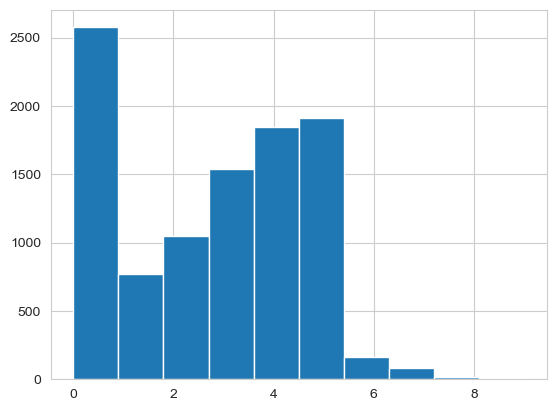

In [98]:
bank['equity'].hist()

Больше всего клиентов, не имеющих в собственности объектов недвижимости.

In [99]:
bank['balance'].value_counts()

26.00         2
38.00         2
0.00          2
39.00         2
59214.82      1
             ..
1452458.87    1
1294391.76    1
1106127.02    1
587485.48     1
1180886.70    1
Name: balance, Length: 7691, dtype: int64

Сразу видим, что есть всего 2 клиента у которых нулевой баланс.

In [100]:
round(bank['balance'].describe())

count         7695.0
mean        827246.0
std        1980327.0
min              0.0
25%         295699.0
50%         524295.0
75%         980051.0
max      119113552.0
Name: balance, dtype: float64

In [101]:
bank[bank['balance'].isna()==True]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,3,892.0,Рыбинск,0,30,0,NaN,1,1,1,107683.34,0
9,10,906.0,Ярославль,0,67,0,NaN,1,0,1,238055.53,0
10,11,927.0,Ростов,1,52,0,NaN,1,1,1,196820.07,0
11,12,921.0,Ростов,1,41,0,NaN,1,1,1,217469.48,0
19,20,922.0,Рыбинск,0,53,0,NaN,1,0,0,147094.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9950,9977,876.0,Ростов,1,38,0,NaN,1,0,0,171763.69,0
9958,9985,729.0,Ярославль,0,42,0,NaN,1,1,1,687538.70,0
9967,9994,884.0,Рыбинск,0,36,0,NaN,1,1,1,169844.88,0
9970,9997,894.0,Ярославль,1,46,0,NaN,1,1,0,196898.29,0


Пропуски в столбце balance не связаны с оттоком клиентов и нет четкой зависимости от других признаков, заменить медианным или средним значением считаю некорректно, ведь это приведет к понижению качества данных. Распределение пропусков носит случайный характер (возможно ошибка при выгрузке данных), если мы удалим пропуски, потеряем большое количество данных и результат по итогу будет искажен. Считаю необходимым оставить пропуски в данных, так как их количество значительное, почти 1/4 часть.

In [102]:
bank['products'].value_counts()

2    5119
1    3323
3    1038
4     474
5      19
0       1
Name: products, dtype: int64

В целом у почти половины клиентов есть по 2 продукта в Банке. Лишь у одного клиента нет продуктов.

<Axes: >

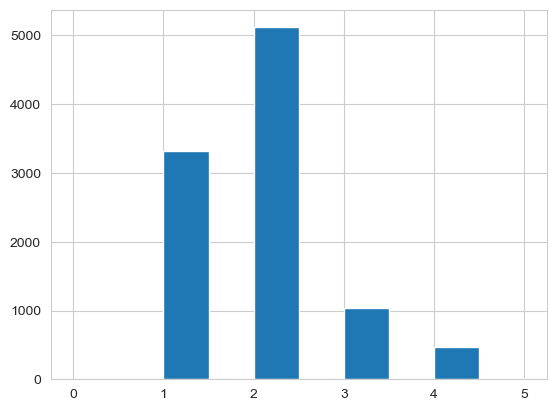

In [103]:
bank['products'].hist()

In [104]:
products0 = bank.query('products == 0')
products0

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8939,8958,962.0,Рыбинск,0,79,3,NaN,0,0,0,25063.96,1


В столбце churn видим, что этот клиент ушёл из банка (написал заявление на расторжение счёта), убирать из анализа его не будем, проставим ему 1 продукт.

In [105]:
bank.loc[bank['products'] == 0, 'products'] = 1

In [106]:
bank['credit_card'].value_counts()

1    6784
0    3190
Name: credit_card, dtype: int64

In [107]:
round(bank['est_salary'].describe())

count       9974.0
mean      147787.0
std       139286.0
min         2546.0
25%        75252.0
50%       119627.0
75%       174500.0
max      1395064.0
Name: est_salary, dtype: float64

In [108]:
bank['churn'].value_counts()

0    8155
1    1819
Name: churn, dtype: int64

1819 клиентов ушли из Банка.


Вывод: Посмотрели на данные, сделали предобработку, а именно удалили строки с пропусками в возрасте, строки с пропусками в балансе оставили, чтобы не искажать результаты исследования, id клиентов были проиндексированы и теперь у каждого клиента свой личный id, нашли ушедшего клиента с 0 продуктов, и добавили его в анализ.

## Исследовательский анализ данных


### Построим визуализации с распределением клиентов, чтобы понять портреты клиетнов

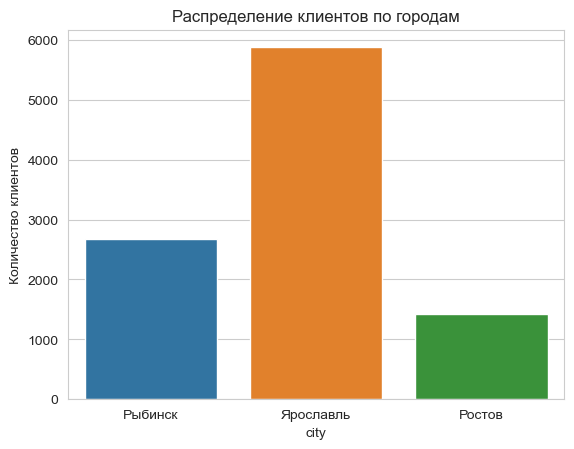

In [109]:
sns.countplot(x='city', data=bank)
plt.title('Распределение клиентов по городам')
plt.ylabel('Количество клиентов')
plt.show()

Больше всего клиентов из Ярославля, на 2 месте клиенты из Рыбинска на 3 из Ростова.

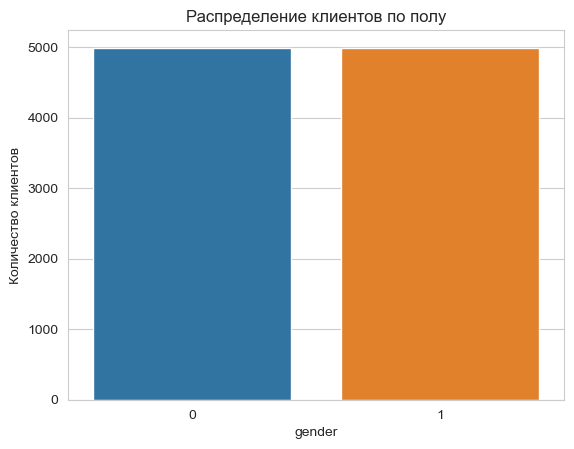

In [110]:
sns.countplot(x='gender', data=bank)
plt.title('Распределение клиентов по полу')
plt.ylabel('Количество клиентов')
plt.show()

Женщин и мужчин равное количество.

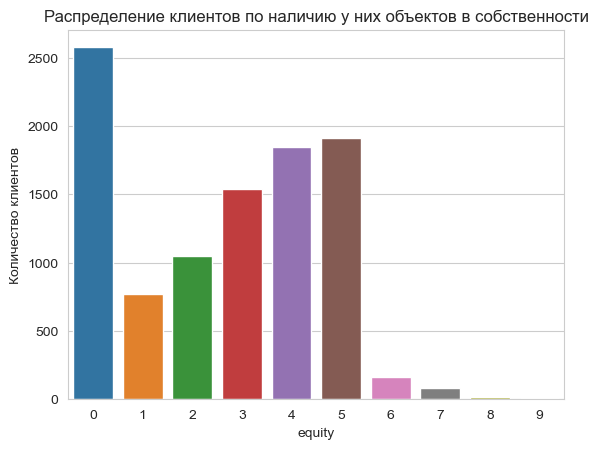

In [111]:
sns.countplot(x='equity', data=bank)
plt.title('Распределение клиентов по наличию у них объектов в собственности')
plt.ylabel('Количество клиентов')
plt.show()



У большинства клиентов нет объектов в собственности, далее видим клиентов, у которых 5 объектов в собственности, третье место занимают клиенты, имеющие 4 объекта в собственности.

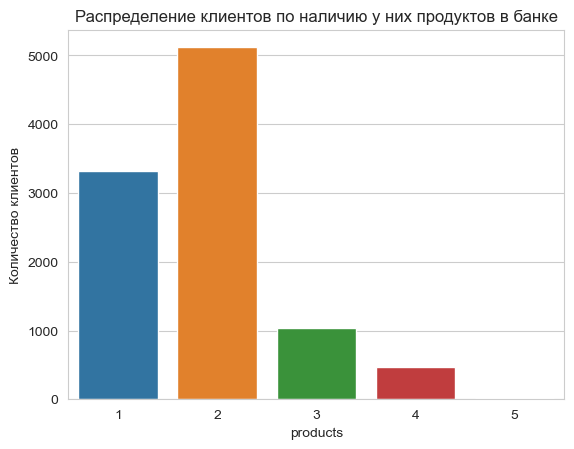

In [112]:
sns.countplot(x='products', data=bank)
plt.title('Распределение клиентов по наличию у них продуктов в банке')
plt.ylabel('Количество клиентов')
plt.show()


Половина клиентов имеют 2 продукта в банке, далее идут клиенты, у которых по 1 продукту, на третьем месте клиенты, имеющие по три продукта.

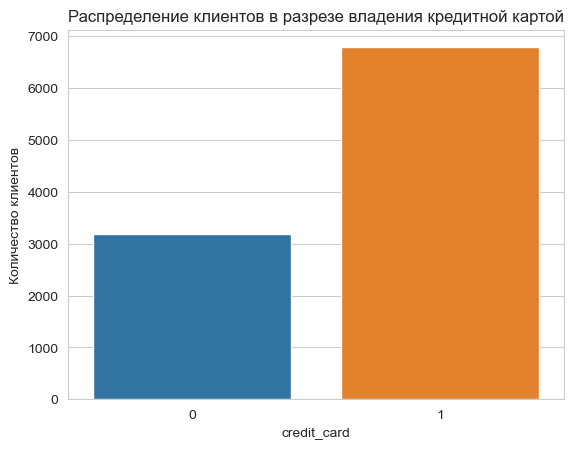

In [113]:
sns.countplot(x='credit_card', data=bank)
plt.title('Распределение клиентов в разрезе владения кредитной картой')
plt.ylabel('Количество клиентов')
plt.show()

Большинство клиентов имеют кредитную карту в банке. Около 50% клиентов без кредитной карты.

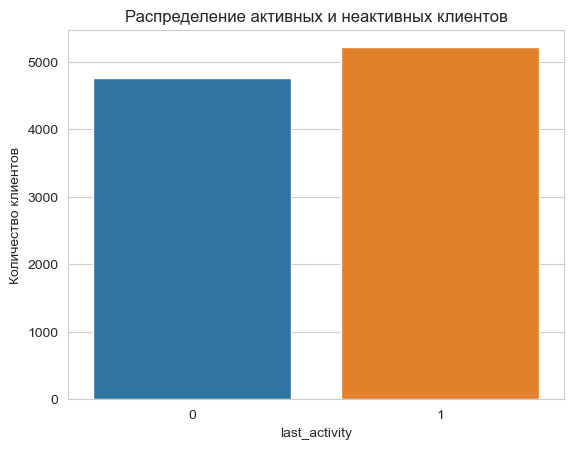

In [114]:
sns.countplot(x='last_activity', data=bank)
plt.title('Распределение активных и неактивных клиентов')
plt.ylabel('Количество клиентов')
plt.show()

Доля активных клиентов - 52.3%, но также почти половина неактивных клиентов.

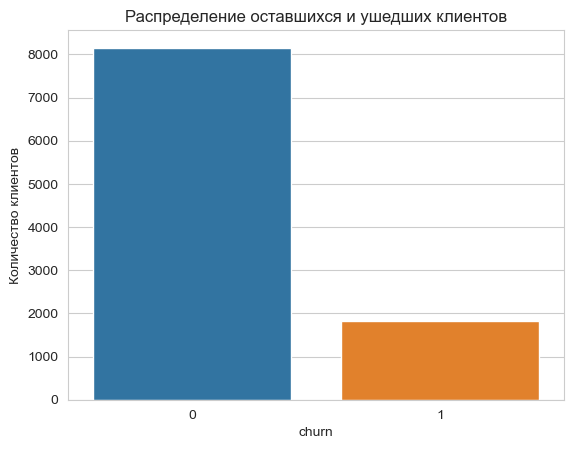

In [115]:
sns.countplot(x='churn', data=bank)
plt.title('Распределение оставшихся и ушедших клиентов')
plt.ylabel('Количество клиентов')
plt.show()

1/5 часть клиентов уходит из Банка.

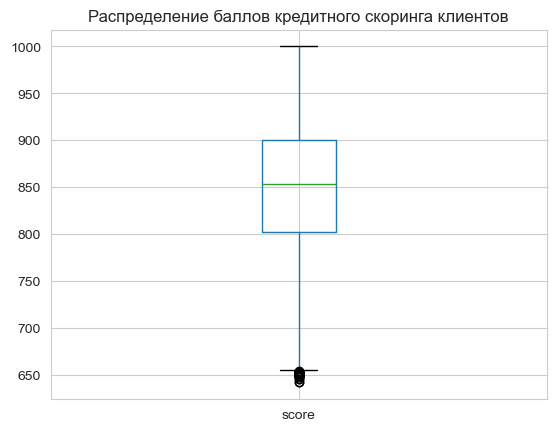

In [116]:
bank.boxplot(column = 'score')
plt.title('Распределение баллов кредитного скоринга клиентов')
plt.show()

По диаграмме размаха заметно, что есть выбросы в данных у клиентов с низким скоринговым баллом. Но если учесть, что скоринговый балл очень тесно влияет на отток клиентов (клиенту может быть отказано в получении кредита или кредитной карты если балл низкий), сохраним данные в исходном виде.

C:\Users\user\AppData\Local\Temp\ipykernel_11896\1126367059.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank['score'])


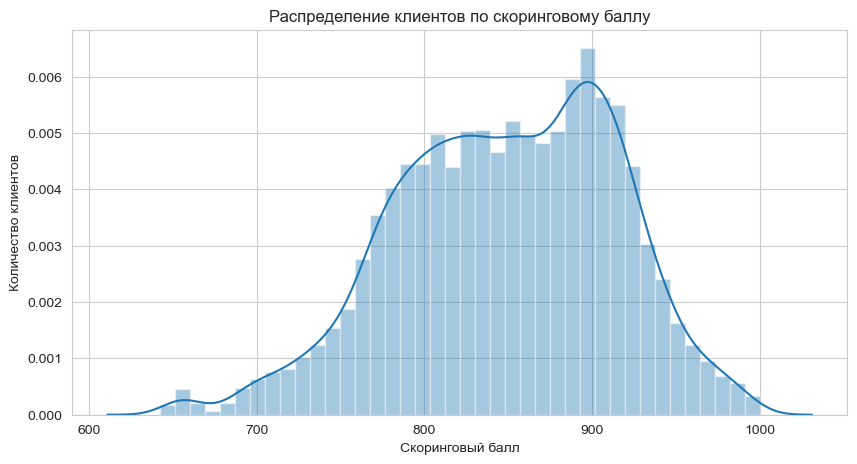

In [117]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.distplot(bank['score'])
plt.title('Распределение клиентов по скоринговому баллу')
plt.xlabel('Скоринговый балл')
plt.ylabel('Количество клиентов')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_11896\2553317740.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank['age'])


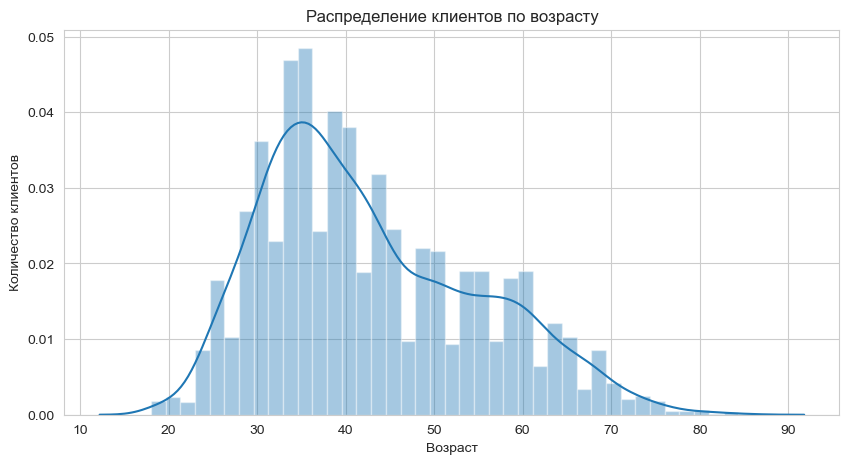

In [118]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.distplot(bank['age'])
plt.title('Распределение клиентов по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_11896\2036274351.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank['balance'])


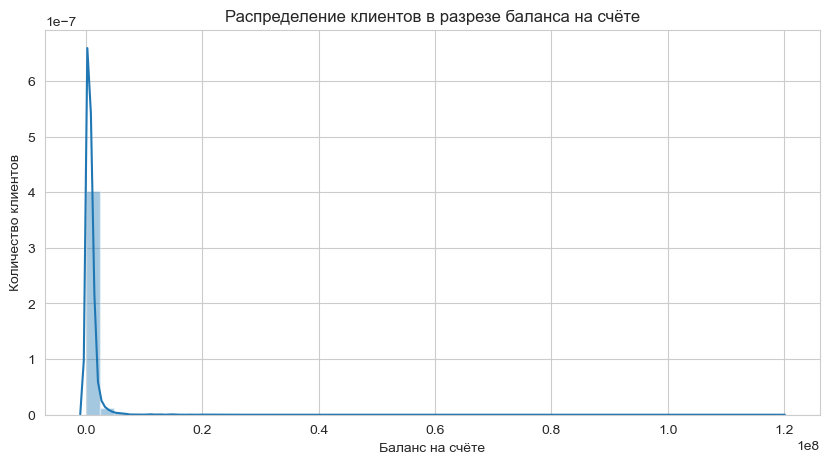

In [119]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.distplot(bank['balance'])
plt.title('Распределение клиентов в разрезе баланса на счёте')
plt.xlabel('Баланс на счёте')
plt.ylabel('Количество клиентов')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_11896\1858999899.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank['est_salary'])


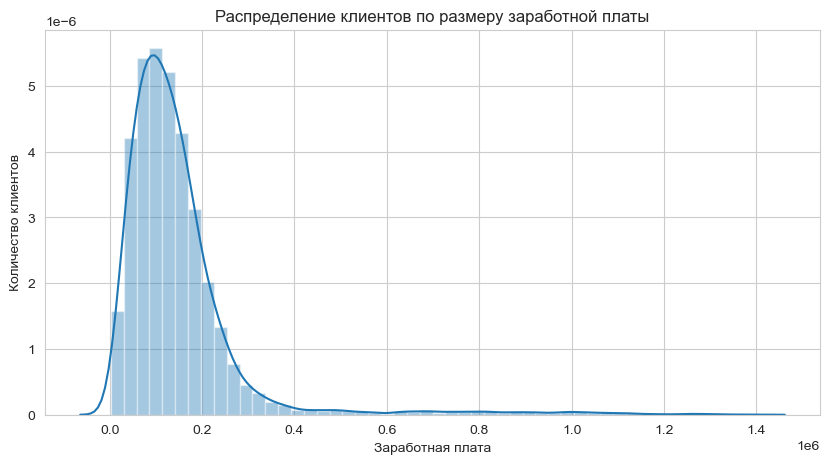

In [120]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.distplot(bank['est_salary'])
plt.title('Распределение клиентов по размеру заработной платы')
plt.xlabel('Заработная плата')
plt.ylabel('Количество клиентов')
plt.show()

Вывод: Больше всего клиентов из Ярославля - 58.9%, из Рыбинска - 26.9%, из Ростова - 14.2%. Доли женщин и мужчин равны.У 25.8% клиентов нет объектов в собственности, далее видим клиентов, у которых 5 объектов в собственности, их доля составляет - 19.2%, третье место занимают клиенты, имеющие 4 объекта в собственности - 18.5%. Половина клиентов имеют 2 продукта в банке, далее идут клиенты, у которых по 1 продукту, их доля - 33.3%, на третьем месте клиенты, имеющие по три продукта. 68% клиентов имеют кредитную карту в банке. 32% клиентов без кредитной карты. Доля активных клиентов - 52.3%, но также почти половина неактивных клиентов. 81.8% клиентов остаются в банке, 18.2% - почти 1/5 часть клиентов уходят из банка. По диаграмме размаха заметно, что есть выбросы в данных у клиентов с низким скоринговым баллом. Но если учесть, что скоринговый балл очень тесно влияет на отток клиентов (клиенту может быть отказано в получении кредита или кредитной карты если скоринговый балл низкий), сохраним данные в исходном виде.

Предполагаю, что клиенты с очень высокой заработной платой и значительным балансом на счету это клиенты Premium сегмента Банка и удалять их нельзя.

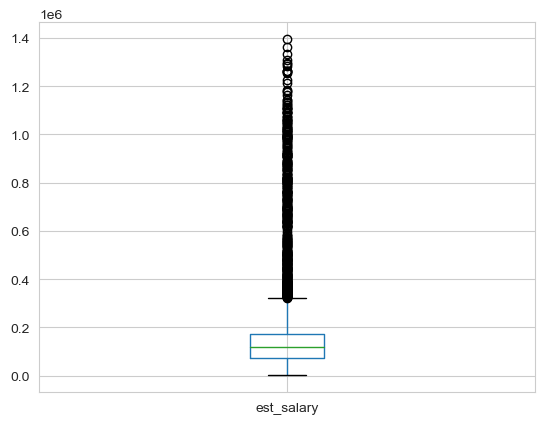

In [121]:
bank.boxplot(column = 'est_salary')
plt.show()

In [122]:
bank['est_salary'].describe()

count    9.974000e+03
mean     1.477868e+05
std      1.392855e+05
min      2.546300e+03
25%      7.525166e+04
50%      1.196268e+05
75%      1.744998e+05
max      1.395064e+06
Name: est_salary, dtype: float64

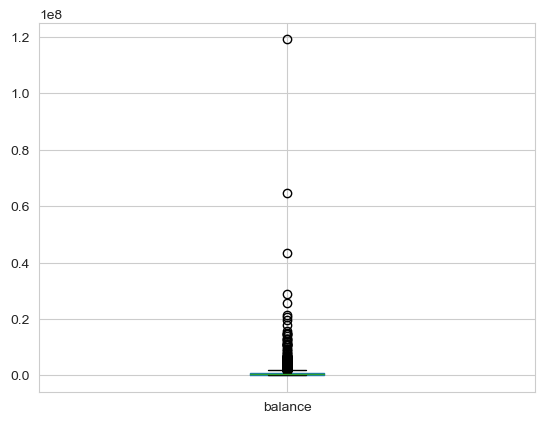

In [123]:
bank.boxplot(column = 'balance')
plt.show()

In [124]:
bank['balance'].describe()

count    7.695000e+03
mean     8.272456e+05
std      1.980327e+06
min      0.000000e+00
25%      2.956987e+05
50%      5.242953e+05
75%      9.800512e+05
max      1.191136e+08
Name: balance, dtype: float64

### Проведем корреляционный анализ, чтобы выявить взаимосвязи между данными и понять что  влияет на отток клиентов больше всего:

Переведем категориальную переменную (город) в бинарный формат при помощи one-hot кодирования для того, чтобы посмотреть корреляцию с другими параметрами:

In [125]:
bank['city_type']=bank['city']
bank=pd.get_dummies(bank, columns=['city_type'])
bank = bank.rename(columns=({'city_type_Ростов':'rostov', 'city_type_Ярославль':'yaroslavl', 'city_type_Рыбинск':'rybinsk'}))
bank

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yaroslavl
0,1,850.0,Рыбинск,0,25,1,59214.82,2,0,1,75719.14,1,0,1,0
1,2,861.0,Рыбинск,0,37,5,850594.33,3,1,0,86621.77,0,0,1,0
2,3,892.0,Рыбинск,0,30,0,NaN,1,1,1,107683.34,0,0,1,0
3,4,866.0,Ярославль,0,51,5,1524746.26,2,0,1,174423.53,1,0,0,1
4,5,730.0,Ярославль,1,34,5,174.00,1,1,0,67353.16,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9969,9996,814.0,Рыбинск,1,27,1,78144.65,1,0,1,18943.64,0,0,1,0
9970,9997,894.0,Ярославль,1,46,0,NaN,1,1,0,196898.29,0,0,0,1
9971,9998,903.0,Ярославль,1,24,0,NaN,2,1,1,108905.09,0,0,0,1
9972,9999,777.0,Ярославль,0,68,3,865457.97,3,0,1,86874.90,0,0,0,1


C:\Users\user\AppData\Local\Temp\ipykernel_11896\654189447.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = bank.drop('user_id', axis=1).corr().round(1)


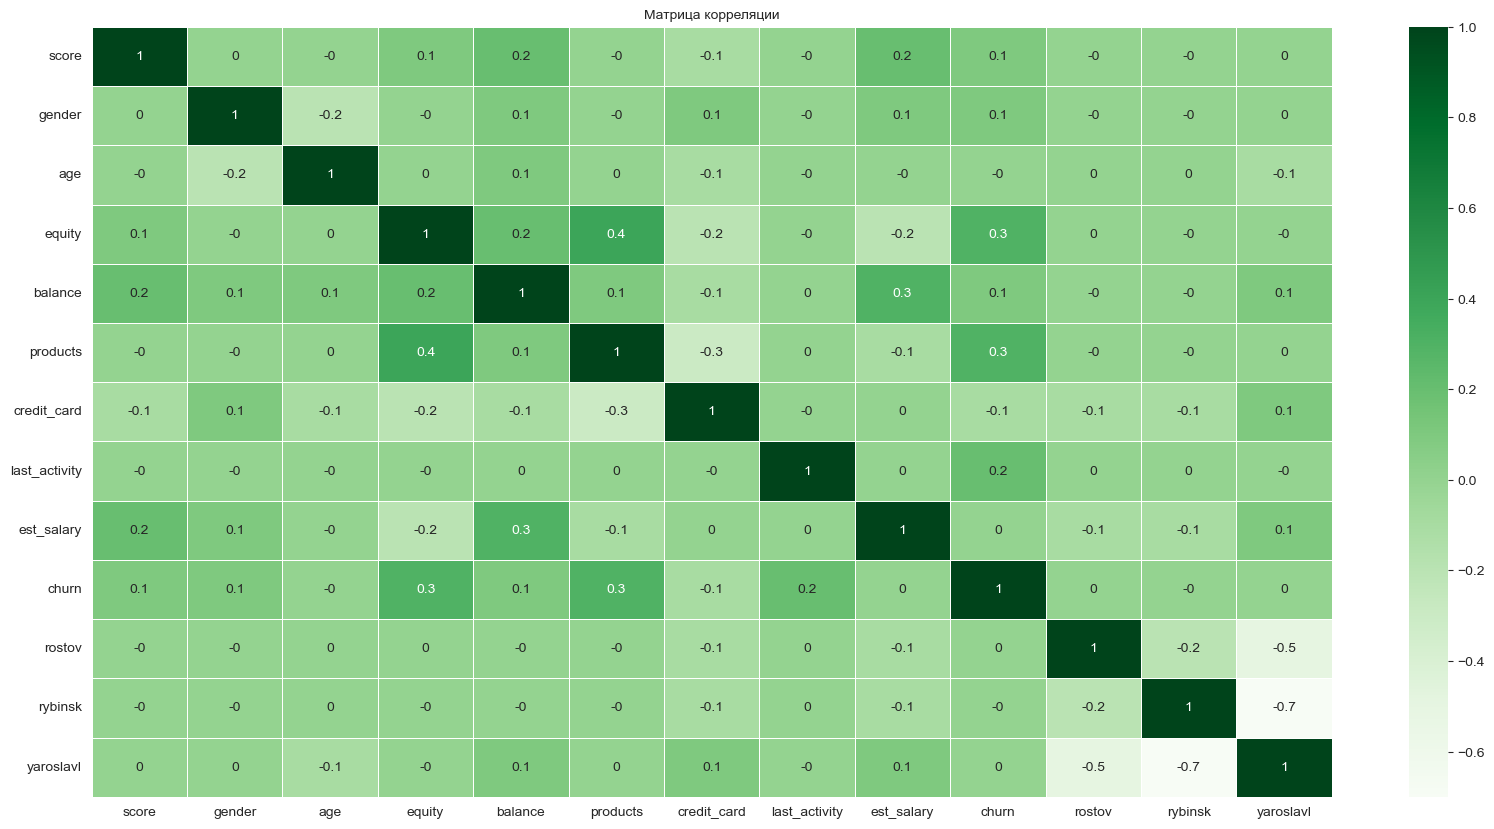

In [126]:
corr_matrix = bank.drop('user_id', axis=1).corr().round(1)
plt.figure(figsize=(20, 10))
ax=sns.heatmap(corr_matrix, annot=True, linewidth=0.5, cmap='Greens')
ax.set_title('Матрица корреляции', fontsize=10)
plt.show()

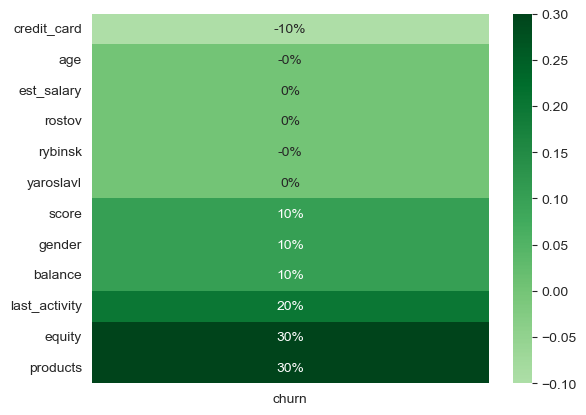

In [127]:
sns.heatmap(
    corr_matrix.loc[:,['churn']].drop('churn').sort_values('churn'),
annot=True, fmt=".0%", cmap="Greens", center=0);

Изучим коэффициенты корреляции матрицы, чтобы оценить силу связи между данными по оттоку, для этого используем шкалу Чеддока:
Наблюдается:
1. Очень слабая прямая линейная связь между скоринговым баллом клиента и оттоком - коэффициент корреляции равен 0.1;
2. Очень слабая прямая линейная связь между полом клиента и оттоком - коэффициент корреляции равен 0.1;
3. Очень слабая прямая линейная связь между балансом клиента на счету и оттоком - коэффициент корреляции равен 0.1;
4. Очень слабая прямая линейная связь между активностью клиента и оттоком - коэффициент корреляции равен 0.2;
5. Слабая прямая линейная связь между количеством объектов в собственности и оттоком - коэффициент корреляции равен 0.3;
6. Слабая прямая линейная связь между количеством продуктов у клиента в банке и оттоком - коэффициент корреляции равен 0.3;
7. Очень слабая обратная связь с наличием кредитной карты у клиента и оттоком - коэффициент корреляции равен (-0,1).

Очень слабая корреляция  наблюдается между оттоком  и балансом на счету,  активностью клиента.
Немного выше корреляция между оттоком и количеством продуктов у клиента в Банке, а также количеством объектов в собственности, но также связь достаточно слаба.

## Проверка статистических гипотез

Для проверки статистических гипотез используем двусторонний t-test, критический уровень статистической значимости alpha 0.05.
Генеральные совокупности не зависят друг от друга, выборки достаточно большие, поэтому выборочные средние, которые можно получить из одной и той же генеральной совокупности будут распределены нормально вокруг истинного среднего этой совокупности. Выборки сильно отличаются по размеру. Для проведения t-test Стьюдента дисперсии рассматриваемых генеральных совокупностей должны быть равны. Но нет оснований считать, что дисперсии у генеральных совокупностей равны, поэтому equal_var=False.

**1. Гипотеза Есть различия в доходе между теми клиентами, которые ушли и теми, которые остались.**

H0: Доходы у ушедших и оставшихся клиентов одинаковые;

H1: Доходы у ушедших и оставшихся клиентов разные;

In [128]:
income0 = bank[(bank['churn']==0)]['est_salary']
income1 = bank[(bank['churn']==1)]['est_salary']

In [129]:
print(np.var(income0))
print(np.var(income1))

20356342952.421207
15104008500.89569


In [130]:
alpha = .05 

results = st.ttest_ind(
    income0, 
    income1,
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.8515799588935961
Не получилось отвергнуть нулевую гипотезу


Доходы у ушедших и оставшихся клиентов одинаковые, вероятность случайно получить одинаковое значение дохода составляет 85%.

**2. Гипотеза Есть различия в кредитном рейтинге между теми клиентами, которые ушли и теми, которые остались.**

H0: Кредитный рейтинг у ушедших и оставшихся клиентов одинаковый;

H1: Кредитный рейтинг у ушедших и оставшихся клиентов разный;

In [131]:
score0 = bank[(bank['churn']==0)]['score']
score1 = bank[(bank['churn']==1)]['score']

In [132]:
print(np.var(score0))
print(np.var(score1))

4622.495755016325
2460.888380877315


In [133]:
alpha = .05 

results = st.ttest_ind(
    score0, 
    score1,
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.60332714629934e-38
Отвергаем нулевую гипотезу


Кредитный рейтинг у ушедших и оставшихся клиентов разный, вероятность случайно получить одинаковое значение рейтинга крайне мала.

Вывод: Доходы у ушедших и оставшихся клиентов одинаковые, вероятность случайно получить одинаковое значение дохода составляет 85%. 
Кредитный рейтинг у ушедших и оставшихся клиентов разный, вероятность случайно получить одинаковое значение рейтинга крайне мала.

## Построим нормализованные гистограммы и посмотрим интервалы признаков, влияющих на отток:

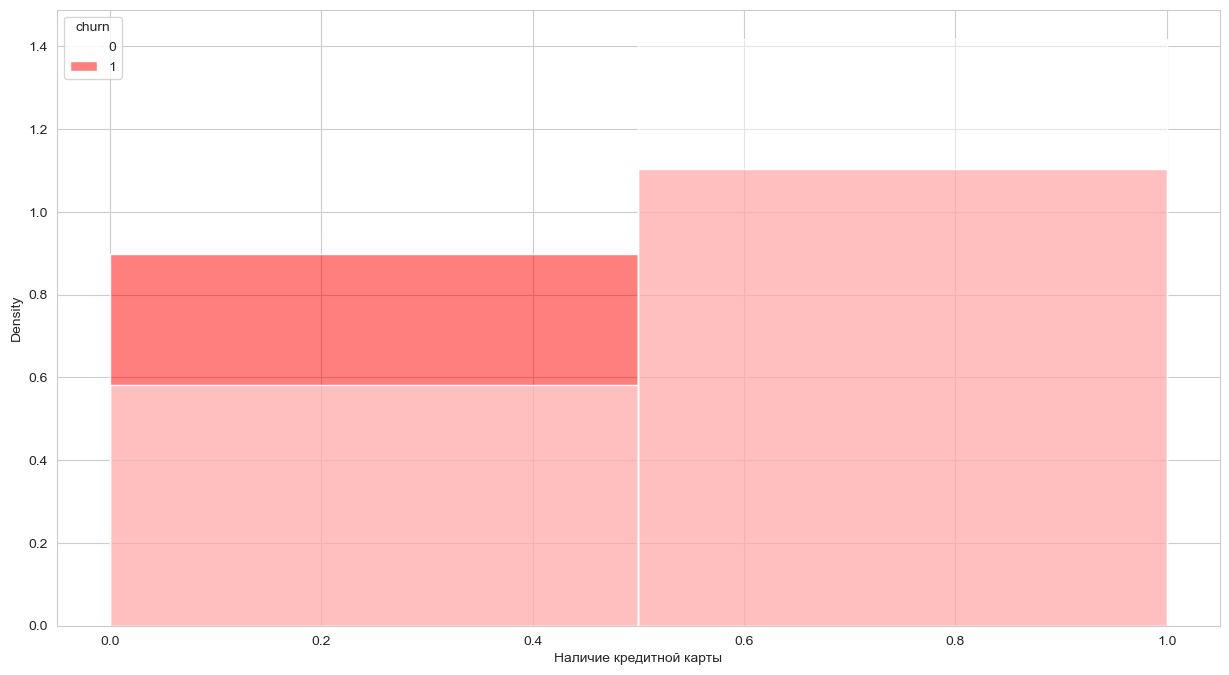

In [134]:
plt.figure(figsize=(15, 8))
palette = sns.color_palette(['white', 'red'])
sns.histplot(data=bank, hue='churn', x='credit_card', stat='density', common_norm=False, palette=palette, bins=2);
plt.xlabel('Наличие кредитной карты')
plt.show()

Наибольший отток клиентов, у которых нет кредитной карты в банке.

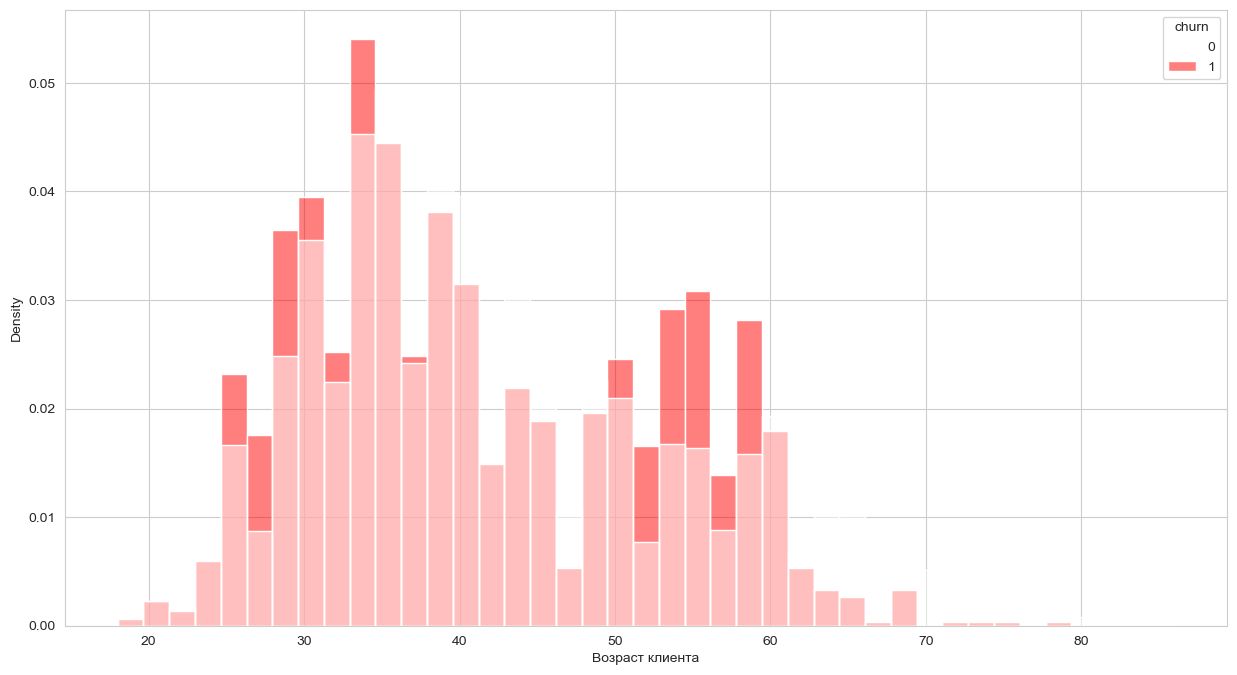

In [135]:
plt.figure(figsize=(15, 8))
palette = sns.color_palette(['white', 'red'])
sns.histplot(data=bank, hue='churn', x='age', stat='density', common_norm=False, palette=palette);
plt.xlabel('Возраст клиента')
plt.show()

Наибольший отток клиентов в возрасте от 25-35 лет и в интервале от 50 до 60 лет.

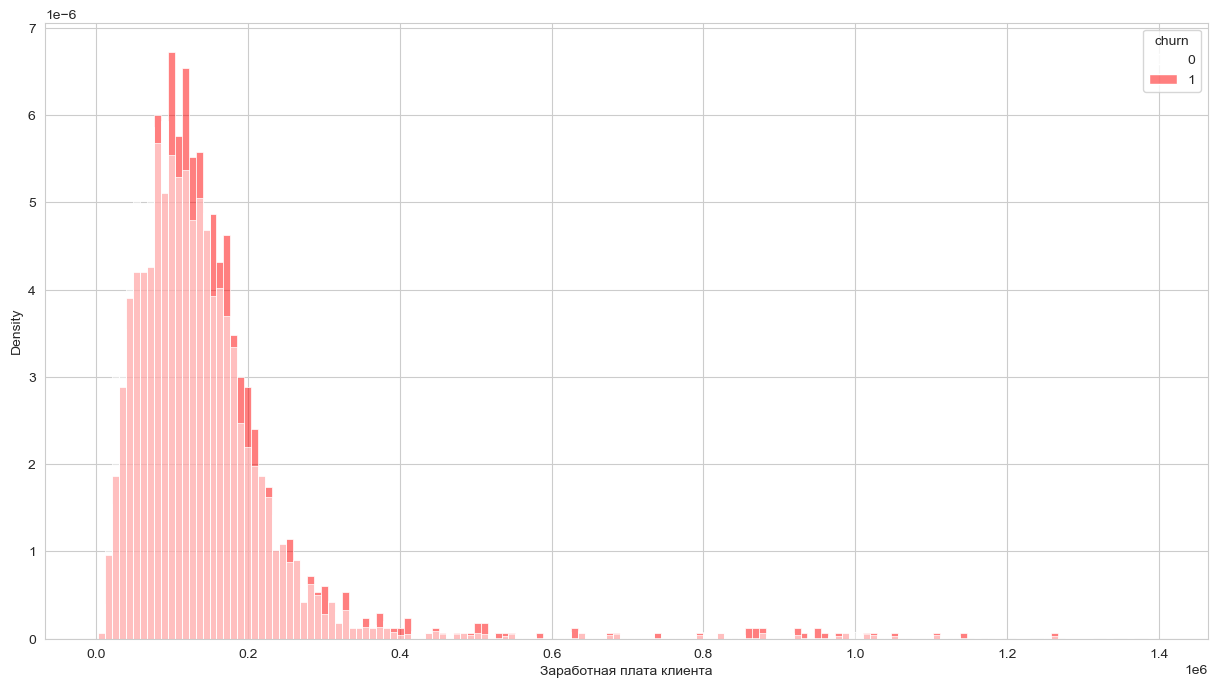

In [136]:
plt.figure(figsize=(15, 8))
palette = sns.color_palette(['white', 'red'])
sns.histplot(data=bank, hue='churn', x='est_salary', stat='density', common_norm=False, palette=palette);
plt.xlabel('Заработная плата клиента')
plt.show()

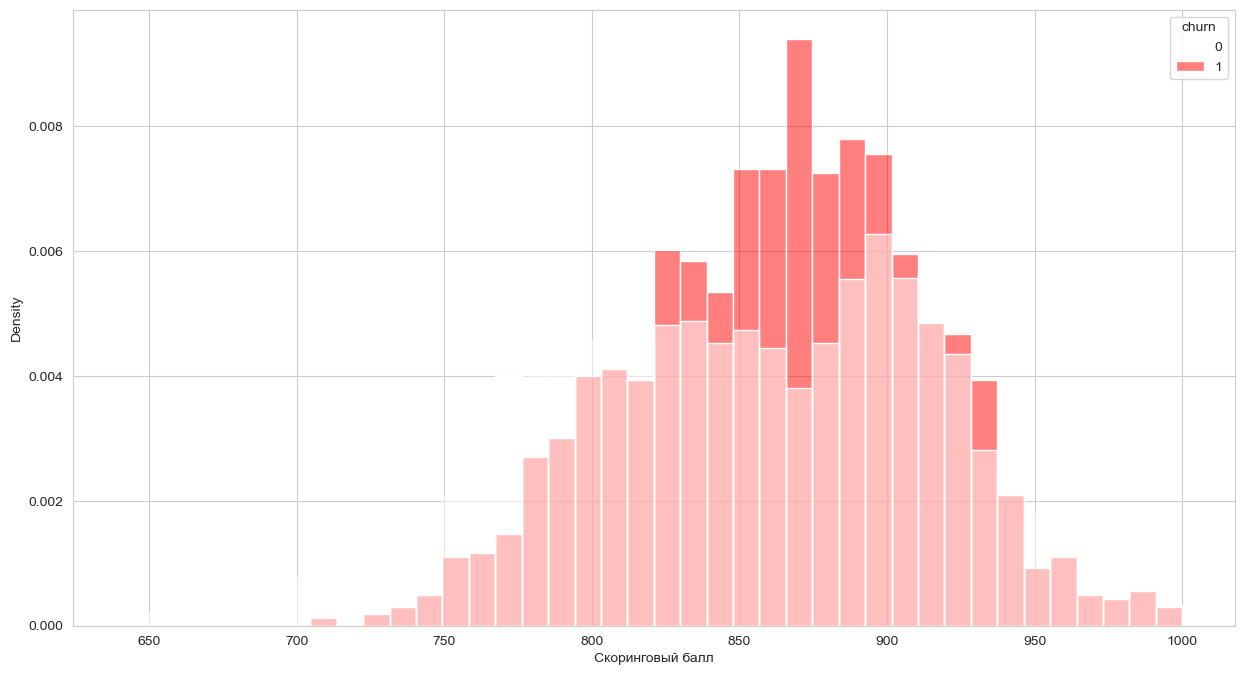

In [137]:
plt.figure(figsize=(15, 8))
palette = sns.color_palette(['white', 'red'])
sns.histplot(data=bank, hue='churn', x='score', stat='density', common_norm=False, palette=palette);
plt.xlabel('Скоринговый балл')
plt.show()

Наиболее отточные клиенты в интервале скорингового балла от 820 до 900.

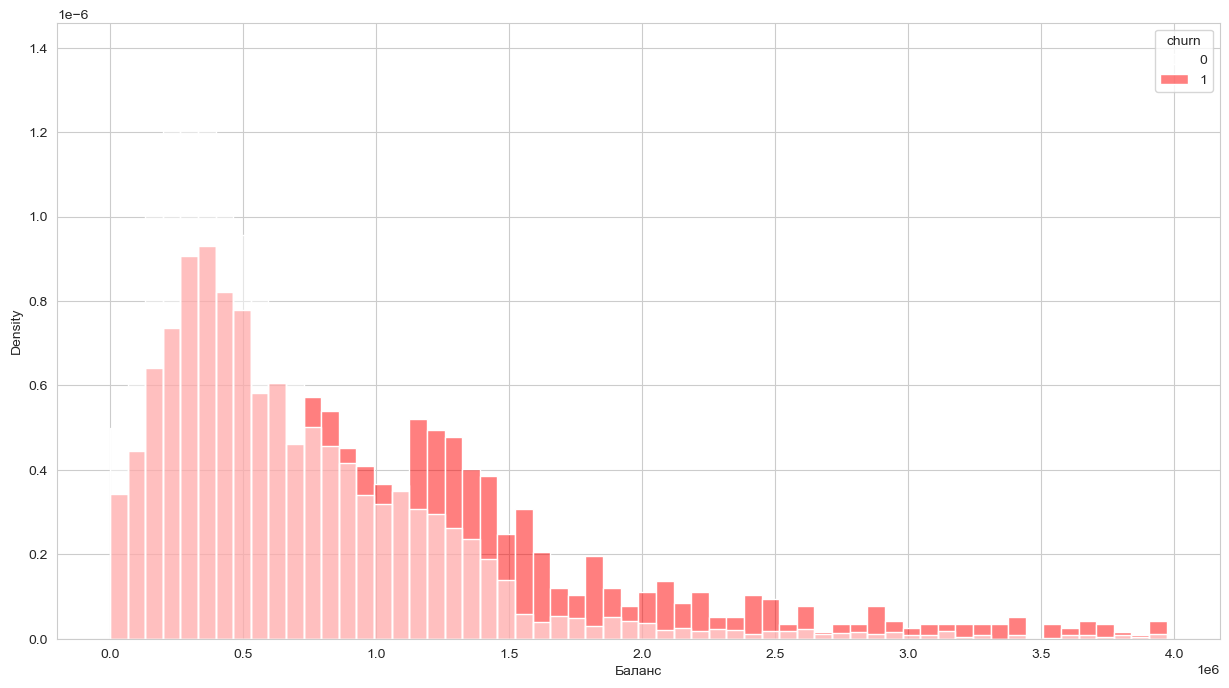

In [138]:
balance_bank = bank.query('balance <= 4000000')
plt.figure(figsize=(15, 8))
palette = sns.color_palette(['white', 'red'])
sns.histplot(data=balance_bank, hue='churn', x='balance', stat='density', common_norm=False, palette=palette);
plt.xlabel('Баланс')
plt.show()

Наиболее отточные клиенты в интервале баланса до 4 млн.руб.


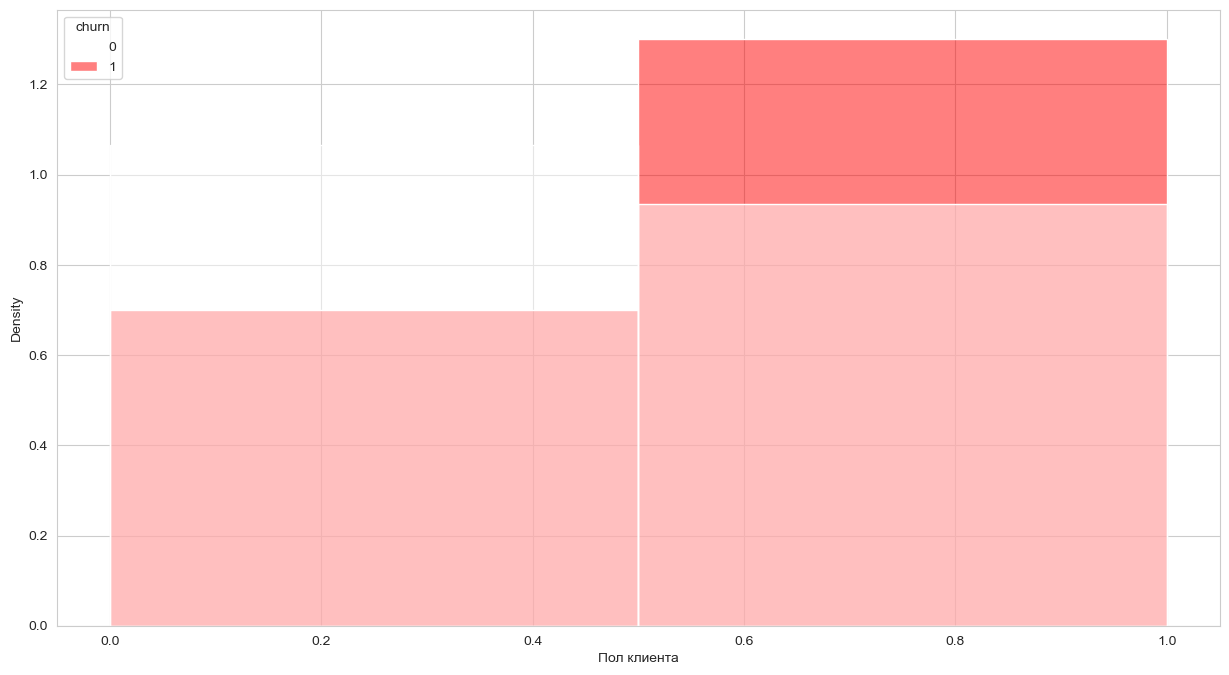

In [139]:
plt.figure(figsize=(15, 8))
palette = sns.color_palette(['white', 'red'])
sns.histplot(data=bank, hue='churn', x='gender', stat='density', common_norm=False, palette=palette, bins=2);
plt.xlabel('Пол клиента')
plt.show()

Наибольший отток клиентов мужчин.

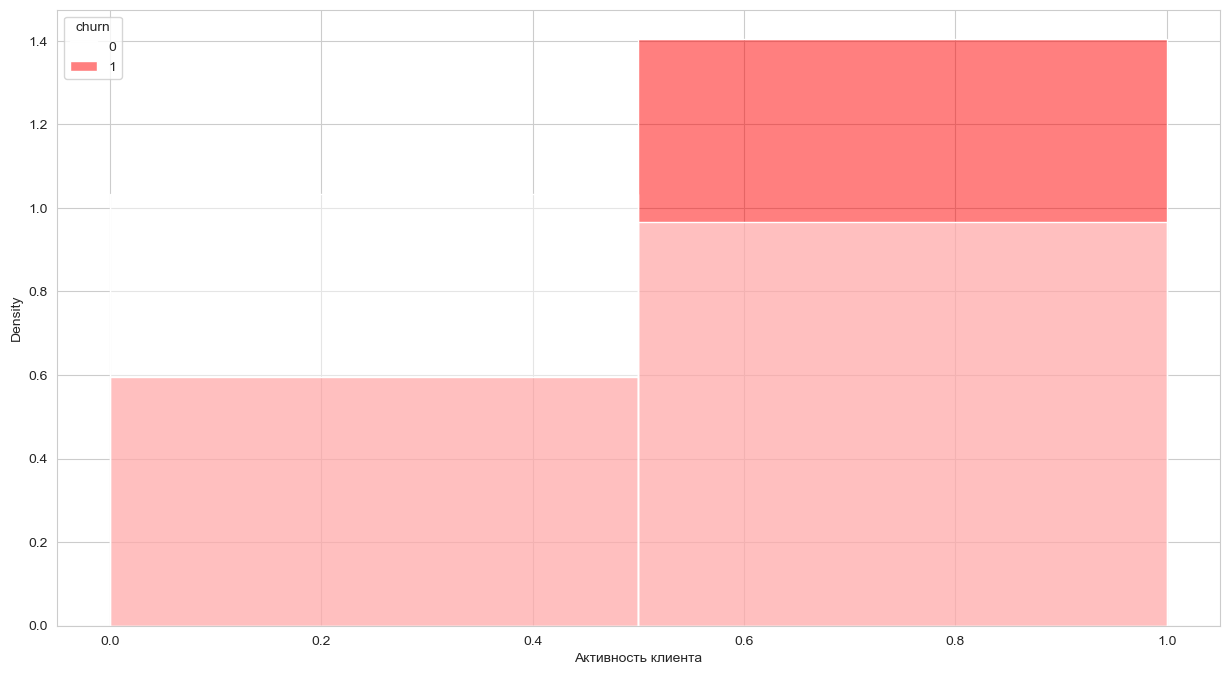

In [140]:
plt.figure(figsize=(15, 8))
palette = sns.color_palette(['white', 'red'])
sns.histplot(data=bank, hue='churn', x='last_activity', stat='density', common_norm=False, palette=palette, bins=2);
plt.xlabel('Активность клиента')
plt.show()

Клиенты, проявляющие активность в последнее время наиболее отточные.

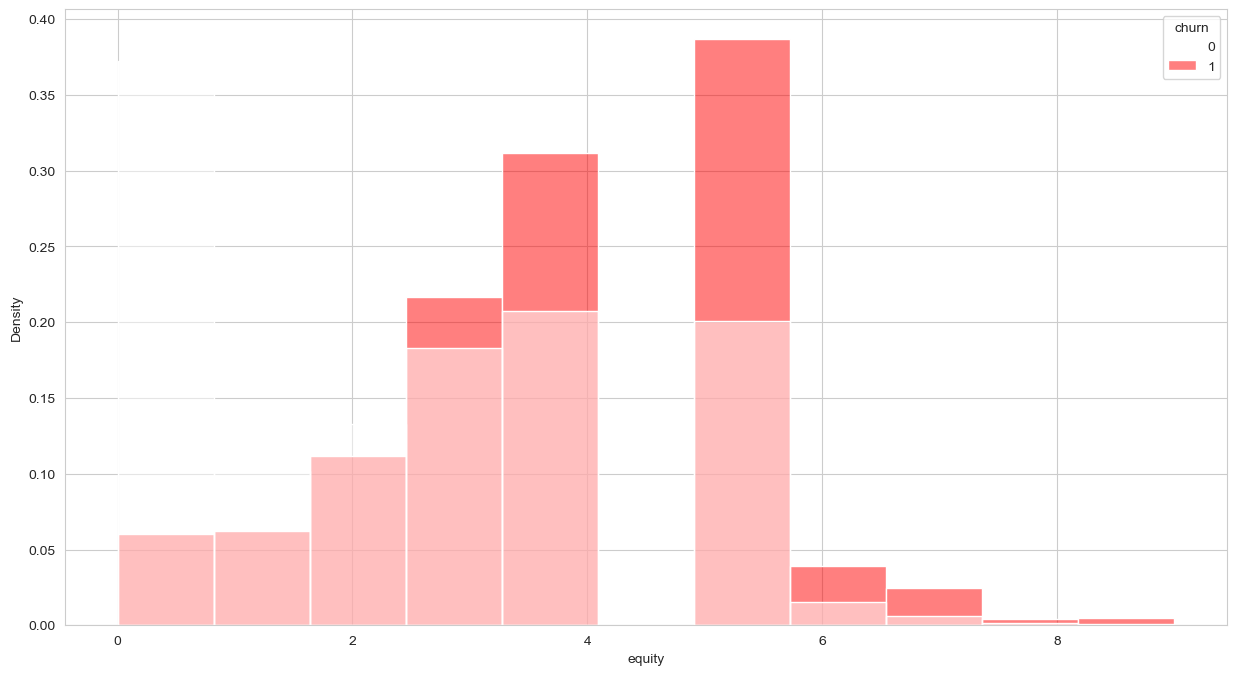

In [141]:
plt.figure(figsize=(15, 8))
palette = sns.color_palette(['white', 'red'])
sns.histplot(data=bank, hue='churn', x='equity', stat='density', common_norm=False, palette=palette, bins=11);
plt.show()

Наибольший отток клиентов имеющих в собственности более 3 объектов.

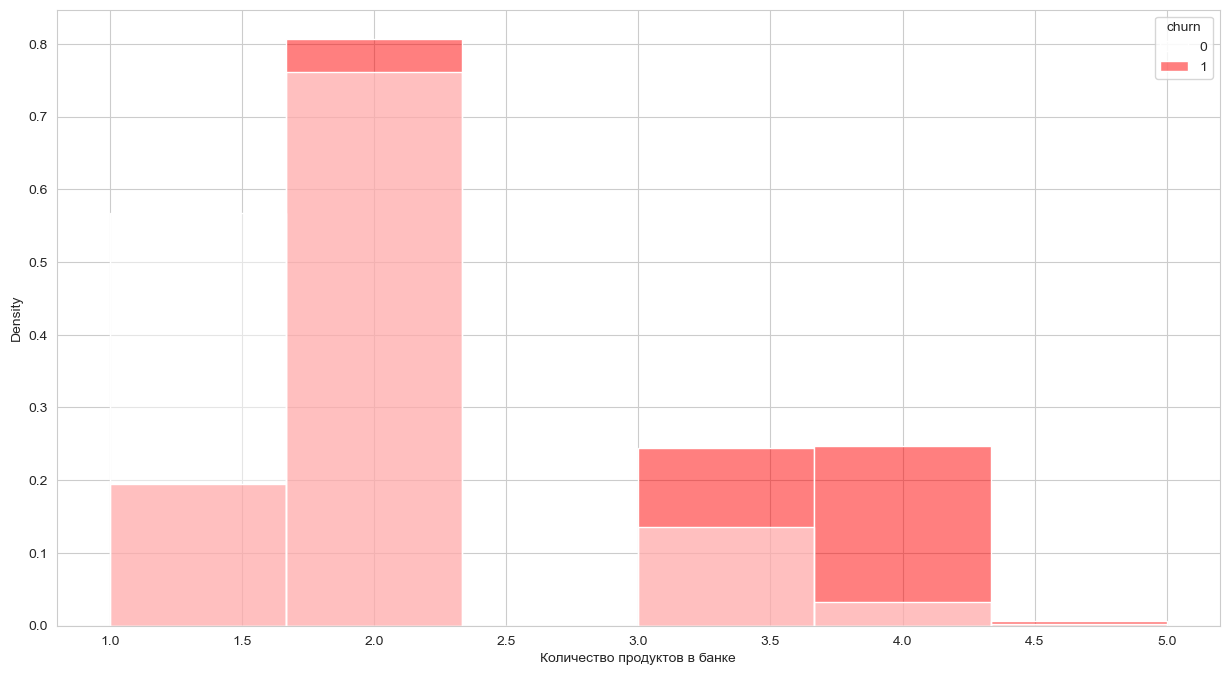

In [142]:
plt.figure(figsize=(15, 8))
palette = sns.color_palette(['white', 'red'])
sns.histplot(data=bank, hue='churn', x='products', stat='density', common_norm=False, palette=palette, bins=6);
plt.xlabel('Количество продуктов в банке')
plt.show()

Наибольший отток клиентов, имеющих более 2 продуктов в банке.

## Посмотрим на портрет оставшегося и отточного клиента:

In [143]:
bank['gender_type']=bank['gender']
bank=pd.get_dummies(bank, columns=['gender_type'])
bank1 = bank.rename(columns=({'gender_type_0':'gp', 'gender_type_1':'mp'}))
bank1

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yaroslavl,gp,mp
0,1,850.0,Рыбинск,0,25,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,2,861.0,Рыбинск,0,37,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,3,892.0,Рыбинск,0,30,0,NaN,1,1,1,107683.34,0,0,1,0,1,0
3,4,866.0,Ярославль,0,51,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
4,5,730.0,Ярославль,1,34,5,174.00,1,1,0,67353.16,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9969,9996,814.0,Рыбинск,1,27,1,78144.65,1,0,1,18943.64,0,0,1,0,0,1
9970,9997,894.0,Ярославль,1,46,0,NaN,1,1,0,196898.29,0,0,0,1,0,1
9971,9998,903.0,Ярославль,1,24,0,NaN,2,1,1,108905.09,0,0,0,1,0,1
9972,9999,777.0,Ярославль,0,68,3,865457.97,3,0,1,86874.90,0,0,0,1,1,0


In [144]:
bank_pivot= bank1.groupby(['churn'])[['score', 'age', 'gp', 'mp', 'equity', 'balance',
       'products', 'est_salary', 'last_activity', 'rostov', 'rybinsk', 'yaroslavl']].agg(
       ['mean']).T
bank_pivot.columns = ['Оставшиеся','Отточные']
bank_pivot['Разница в относительном выражении'] = (bank_pivot['Отточные']-bank_pivot['Оставшиеся'])/(bank_pivot['Отточные'])

bank_pivot['Разница в относительном выражении'] = bank_pivot['Разница в относительном выражении'].apply(lambda x: round(x * 100, 1))

bank_pivot

,,Оставшиеся,Отточные,Разница в относительном выражении
score,mean,845.396199,8.634162e+02,2.1
age,mean,43.020846,4.145025e+01,-3.8
gp,mean,0.533047,3.496427e-01,-52.5
mp,mean,0.466953,6.503573e-01,28.2
equity,mean,2.378296,3.763057e+00,36.8
balance,mean,733031.630149,1.134458e+06,35.4
products,mean,1.758921,2.376581e+00,26.0
est_salary,mean,147674.637881,1.482897e+05,0.4
last_activity,mean,0.482894,7.020341e-01,31.2
rostov,mean,0.141140,1.456844e-01,3.1


По таблице мы видим портрет оставшегося и отточного клиента 
Наибольшая разница в относительном выражении между оставшимся и отточными клиентами наблюдается по признакам:
- количество объектов в собственности (equity) - 36.8;
- баланс на счету (balance) - 35.4;
- активность клиента в последнее время (last_activity) - 31.2;
- количество продуктов в банке (products) -26.

Большего всего из банка уходят мужчины, клиенты, проявляющие активность в последнее время и клиенты из Ярославля. Скоринговый балл между оставшимися и отточными клиентами различается незначительно, на 2.1%, средняя заработная плата различается на 0.4%, различия в возрасте в среднем составляют порядка 2 лет.

## Выделим сегменты клиентов и приоритизируем их по наибольшему оттоку:

Возьмем интервал оттока в разрезе баланса менее 4 млн.руб. на счету и одновременно клиентов имеющих более 2 продуктов в банке:

In [151]:
one_segment = bank.query('balance < 4000000 and products > 2')
one_segment.groupby('churn')['churn'].count()

churn
0    877
1    588
Name: churn, dtype: int64

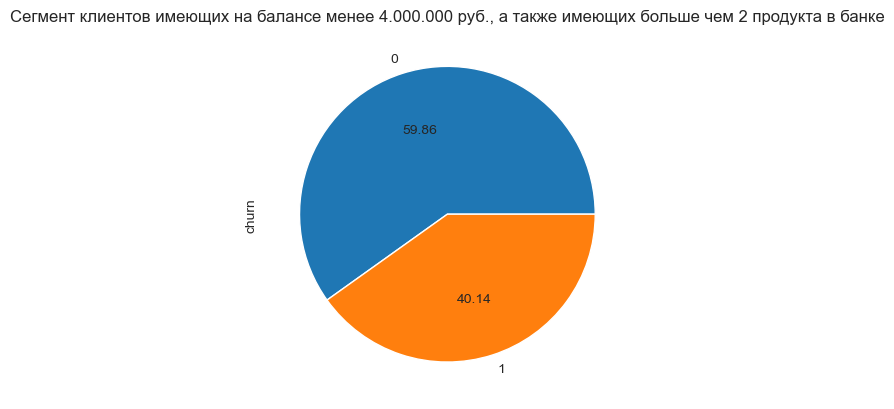

In [146]:
one_segment.groupby('churn')['churn'].count().sort_values(ascending=False).plot(kind='pie',autopct='%.2f')
plt.title('Сегмент клиентов имеющих на балансе менее 4.000.000 руб., а также имеющих больше чем 2 продукта в банке')
plt.show()

1465 клиентов, 40,14% из них ушли из банка.

Возьмем интервал клиентов с количеством объектов в собственности более 3 объектов и только мужчин.

In [147]:
two_segment = bank.query('gender == 1 and equity > 3')
two_segment.groupby('churn')['churn'].count()

churn
0    1251
1     763
Name: churn, dtype: int64

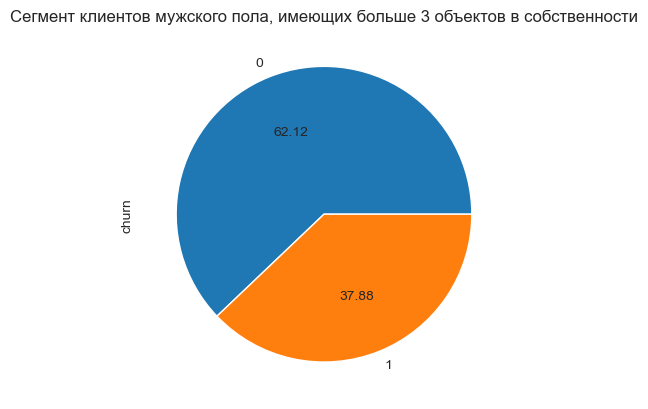

In [148]:
two_segment.groupby('churn')['churn'].count().sort_values(ascending=False).plot(kind='pie',autopct='%.2f')
plt.title('Сегмент клиентов мужского пола, имеющих больше 3 объектов в собственности')
plt.show()

2014 клиентов, 37,88% из них ушли из банка.

Возьмем клиентов с диапазоном значений скорингового балла от 820 до 910, но только тех, кто проявлял активность в последнее время.

In [149]:
tree_segment = bank.query('score > 820 and score < 910 and last_activity == 1')
tree_segment.groupby('churn')['churn'].count()

churn
0    1517
1     857
Name: churn, dtype: int64

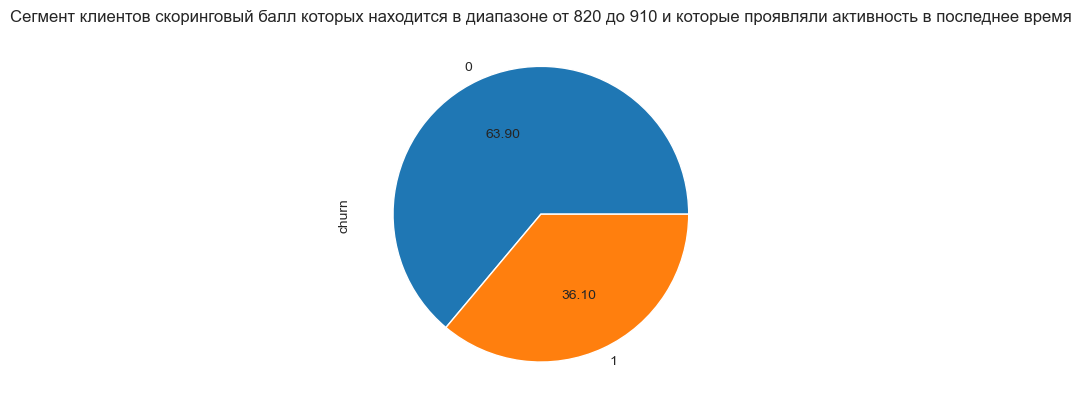

In [150]:
tree_segment.groupby('churn')['churn'].count().sort_values(ascending=False).plot(kind='pie',autopct='%.2f')
plt.title('Сегмент клиентов скоринговый балл которых находится в диапазоне от 820 до 910 и которые проявляли активность в последнее время')
plt.show()

2374 клиентов, 36,10% из них ушли из банка.


**Итог исследования:**

Изучили данные, сделали предобработку, а именно удалили строки с пропусками в возрасте, строки с пропусками в балансе оставили, выяснили, что нет задвоения в id клиентов, так как клиенты из разных городов, переиндексировали таблицу и присвоили клиентам личный id, нашли ушедшего клиента с 0 продуктов, и добавили его в анализ.

Больше всего клиентов из Ярославля - 58.9%, из Рыбинска - 26.9%, из Ростова - 14.2%. Доли женщин и мужчин равны.У 25.8% клиентов нет объектов в собственности, далее видим клиентов, у которых 5 объектов в собственности, их доля составляет - 19.2%, третье место занимают клиенты, имеющие 4 объекта в собственности - 18.5%. Половина клиентов имеют 2 продукта в банке, далее идут клиенты, у которых по 1 продукту, их доля - 33.3%, на третьем месте клиенты, имеющие по три продукта. 68% клиентов имеют кредитную карту в банке. 32% клиентов без кредитной карты. Доля активных клиентов - 52.3%, но также почти половина неактивных клиентов. 81.8% клиентов остаются в банке, 18.2% - почти 1/5 часть клиентов уходят из банка. 

Изучили коэффициенты корреляции матрицы, чтобы оценить силу связи между данными по оттоку, для этого использовали шкалу Чеддока:
Наблюдается:
1. Очень слабая прямая линейная связь между скоринговым баллом клиента и оттоком - коэффициент корреляции равен 0.1;
2. Очень слабая прямая линейная связь между полом клиента и оттоком - коэффициент корреляции равен 0.1;
3. Очень слабая прямая линейная связь между балансом клиента на счету и оттоком - коэффициент корреляции равен 0.1;
4. Очень слабая прямая линейная связь между активностью клиента и оттоком - коэффициент корреляции равен 0.2;
5. Слабая прямая линейная связь между количеством объектов в собственности и оттоком - коэффициент корреляции равен 0.3;
6. Слабая прямая линейная связь между количеством продуктов у клиента в банке и оттоком - коэффициент корреляции равен 0.3;
7. Очень слабая обратная связь с наличием кредитной карты у клиента и оттоком - коэффициент корреляции равен (-0,1).

В целом мы видим, что не наблюдается средней или высокой связи между признаками, но видим, что на отток в большей степени влияла активность клиентов (вероятно перед уходом клиента фиксируется активность: закрытие счета и снятие денег, закрытие вклада или кредита, закрытие карты), количество объектов в собственности и количество продуктов в банке у клиента.

Проверили статистические гипотезы и выявили:
1. Доходы у ушедших и оставшихся клиентов одинаковые, вероятность случайно получить одинаковое значение дохода составляет 85%. 
2. Кредитный рейтинг у ушедших и оставшихся клиентов разный, вероятность случайно получить одинаковое значение рейтинга крайне мала.

Рассмотрели портреты оставшегося и отточного клиента и увидели:
Наибольшая относительная разница между оставшимся и отточными клиентами наблюдается по признакам:
- количество объектов в собственности (equity) - 36.8;
- баланс на счету (balance) - 35.4;
- активность клиента в последнее время (last_activity) - 31.2;
- количество продуктов в банке (products) -26.

Большего всего из банка уходят мужчины, клиенты, проявляющие активность в последнее время и клиенты из Ярославля. Скоринговый балл между оставшимися и отточными клиентами различается незначительно, на 2.1%, средняя заработная плата различается на 0.4%, различия в возрасте в среднем составляют около 2 лет.

Выделили 3 самых отточных сегмента:
1. Сегмент клиентов имеющих на балансе менее 4.000.000 руб., а также имеющих больше чем 2 продукта в банке;
2. Сегмент клиентов мужского пола, имеющих больше 3 объектов в собственности;
3. Сегмент клиентов скоринговый балл которых находится в диапазоне от 820 до 910 и которые проявляли активность в последнее время.

Рекомендации: 
1. Клиентам, имеющим более 2 продуктов в банке и имеющих баланс менее 4 млн.руб. для удержания предложить систему повышенного cash-back, так как скорее всего это клиенты, которые часто пользуются картами и совершают много транзакций.
2. Клиентам мужчинам, имеющим более 3 объектов в собственности для удержания предложить интересные инвестиционные программы или переход на Premium - обслуживание.Также можно предложить карту с консьерж-сервисом либо дополнительные услуги ввиде оформления полиса КАСКО если имеется автомобиль в собственности, если недвижимость, предложить имущественное страхование.
3. Клиентам из 3 сегмента предложить индивидуальные скидки по кредитным продуктам, так как это сегмент очень надежных клиентов. Можно предложить перевести зарплату в Банк и далее предложить систему льгот по кредитованию для зарплатных клиентов.